# Analysis on Heart Diseases

### Load Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

### Dataset Information

**Age:** age in years.

**Sex:** sex (1=male; 0=female).

**Cp:** chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).

**Trestbps:** resting blood pressure in mm Hg on admission to the hospital.

**Chol:** serum cholesterol in mg/dl. 

**fbs:** fasting blood sugar > 120 mg/dl (1=true; 0=false).

**Restecg:** resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).

**Thalach:** maximum heart rate achieved. 

**Exang:** exercise-induced angina (1=yes; 0=no).

**Oldpeak:** ST depression induced by exercise relative to rest.

**Slope:** the slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).

**Ca:** number of major vessels (0–3) colored by fluorosopy.

**Thal:** thalassemia (1=normal; 2=fixed defect; 3=reversable defect).

**Target:** heart disease (0=no, 1=yes).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().round(0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,149.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,1.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
#Making function to see all different types of values
def print_unique_values(fdf):
    for column in fdf:
        print( f'{column} : \n{df[column].unique()}\n')
        
print_unique_values(df)

age : 
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

sex : 
[1 0]

cp : 
[0 1 2 3]

trestbps : 
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

chol : 
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 1

In [10]:
df.corr().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


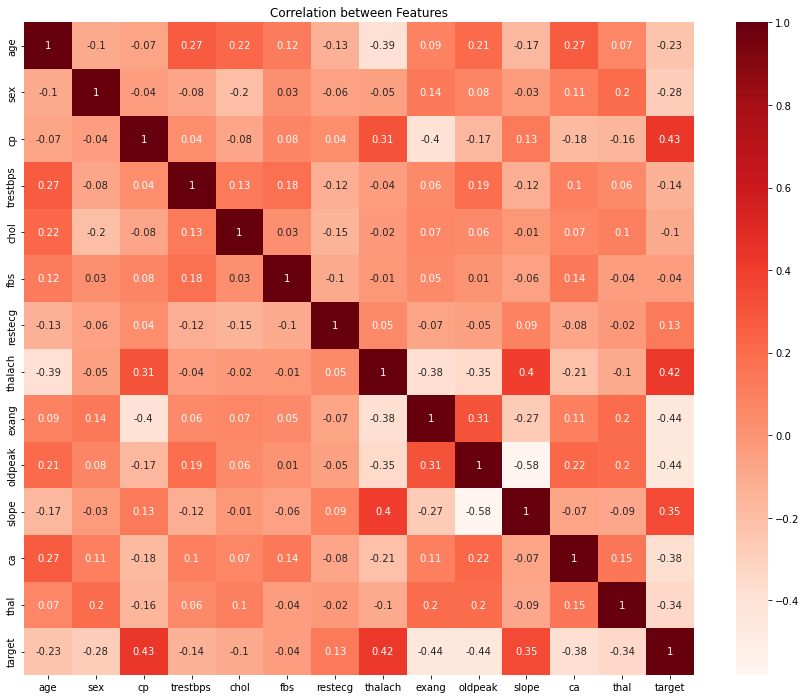

In [11]:
plt.figure(figsize=(15,12))
plt.title('Correlation between Features', color="Black",fontsize=12)

sns.heatmap(df.corr().round(2),annot=True,cmap="Reds")
plt.show()

In [12]:
def get_redundant_pairs(df):
    #Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [13]:
print("Top Absolute Correlations:\n")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations:

oldpeak  slope     0.575189
         target    0.438441
exang    target    0.438029
dtype: float64


Let's separate Categorical and Numerical Features.

In [14]:
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope' ,'ca', 'thal']
numerical_features=['age', 'trestbps', 'chol' , 'thalach', 'oldpeak']

In [15]:
cdf=df[cat_features].copy()
ndf=df[numerical_features].copy()

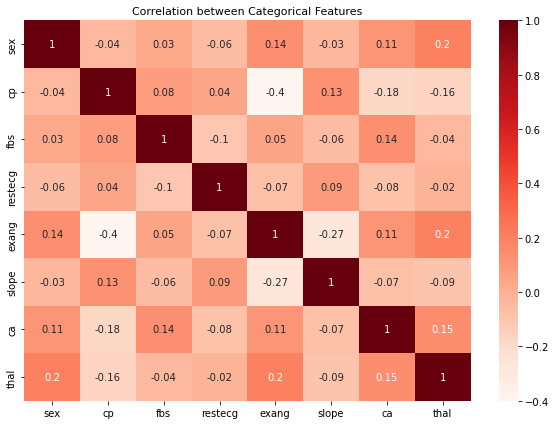

In [16]:
plt.figure(figsize=(10,7))
plt.title('Correlation between Categorical Features', fontsize=11)
sns.heatmap(cdf.corr().round(2),annot=True,cmap="Reds")
plt.show()

In [17]:
print("Top Absolute Correlations between Categorical Features:\n")
print(get_top_abs_correlations(cdf, 3))

Top Absolute Correlations between Categorical Features:

cp     exang    0.401513
exang  slope    0.267335
sex    thal     0.198424
dtype: float64


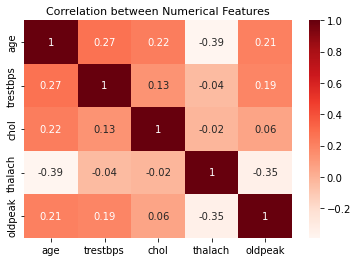

In [18]:
plt.title('Correlation between Numerical Features', fontsize=11)
sns.heatmap(ndf.corr().round(2),annot=True,cmap="Reds")
plt.show()

In [19]:
print("Top Absolute Correlations Numerical Features:\n")
print(get_top_abs_correlations(ndf, 3))

Top Absolute Correlations Numerical Features:

age      thalach     0.390227
thalach  oldpeak     0.349796
age      trestbps    0.271121
dtype: float64


In [20]:
#Color
colors=['#df2020', '#ff7f7f']

### Data Cleaning

In [21]:
#Remove 0 from thalesemia 
df = df[df.thal != 0]

### Heart Disease Distribution

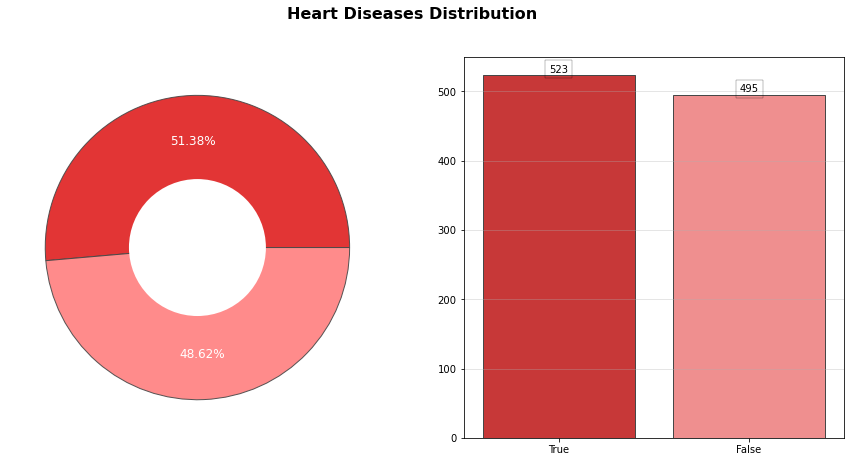

In [22]:

#colors=['#eb372a', '#fcaa8d']
labels=['True', 'False']
order=df['target'].value_counts().index

plt.figure(figsize=(15,7))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif')

#Pie Chart
plt.subplot(1, 2, 1)
plt.pie(df['target'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.9, edgecolor="#474747"), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12,'color':"w"})

centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Histogram
countplt = plt.subplot(1, 2, 2)
ax = sns.countplot(x='target', data=df, palette=colors, order=order, edgecolor="#474747")

for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25))

ax.set(xlabel=None, ylabel=None)
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)

**Almost 51% of the patients have heart disease, which is 526 out of 1025.**

Let's separate heart disease data.

In [23]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]

### Categorical Features Distribution

In [24]:
dt=df.copy()

#### Converting features to categorical features 

In [25]:
dt["sex"] = dt.sex.apply(lambda  x:'Male' if x==1 else 'Female')

dt['cp'][dt['cp'] == 0] = 'Typical angina'
dt['cp'][dt['cp'] == 1] = 'Atypical angina'
dt['cp'][dt['cp'] == 2] = 'Non-anginal pain'
dt['cp'][dt['cp'] == 3] = 'Asymptomatic'

dt["fbs"] = dt.fbs.apply(lambda  x:'True' if x==1 else 'False')

dt['restecg'][dt['restecg'] == 0] = 'Normal'
dt['restecg'][dt['restecg'] == 1] = 'ST-T wave abnormality'
dt['restecg'][dt['restecg'] == 2] = 'Left ventricular hypertrophy'

dt["thalach"] = dt.thal.apply(lambda  x:'Yes' if x==1 else 'No')

dt["exang"] = dt.exang.apply(lambda  x:'Yes' if x==1 else 'No')

dt['slope'][dt['slope'] == 0] = 'Upsloping'
dt['slope'][dt['slope'] == 1] = 'Flat'
dt['slope'][dt['slope'] == 2] = 'Downsloping'

dt['thal'][dt['thal'] == 1] = 'Normal'
dt['thal'][dt['thal'] == 2] = 'Fixed defect'
dt['thal'][dt['thal'] == 3] = 'Reversable defect'

In [26]:
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical angina,125,212,False,ST-T wave abnormality,No,No,1.0,Downsloping,2,Reversable defect,0
1,53,Male,Typical angina,140,203,True,Normal,No,Yes,3.1,Upsloping,0,Reversable defect,0
2,70,Male,Typical angina,145,174,False,ST-T wave abnormality,No,Yes,2.6,Upsloping,0,Reversable defect,0
3,61,Male,Typical angina,148,203,False,ST-T wave abnormality,No,No,0.0,Downsloping,1,Reversable defect,0
4,62,Female,Typical angina,138,294,True,ST-T wave abnormality,No,No,1.9,Flat,3,Fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,False,ST-T wave abnormality,No,Yes,0.0,Downsloping,0,Fixed defect,1
1021,60,Male,Typical angina,125,258,False,Normal,No,Yes,2.8,Flat,1,Reversable defect,0
1022,47,Male,Typical angina,110,275,False,Normal,No,Yes,1.0,Flat,1,Fixed defect,0
1023,50,Female,Typical angina,110,254,False,Normal,No,No,0.0,Downsloping,0,Fixed defect,1


In [27]:
#Separate Heart patients from normal people
#dt0 = dt[dt.target == 0]
dt1 = dt[dt.target == 1]

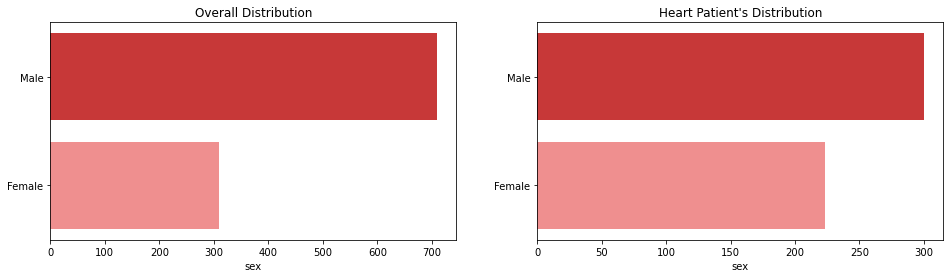

In [28]:
#Gender

val=dt["sex"].value_counts()
val1=dt1["sex"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors, )

plt.subplot(1, 2, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

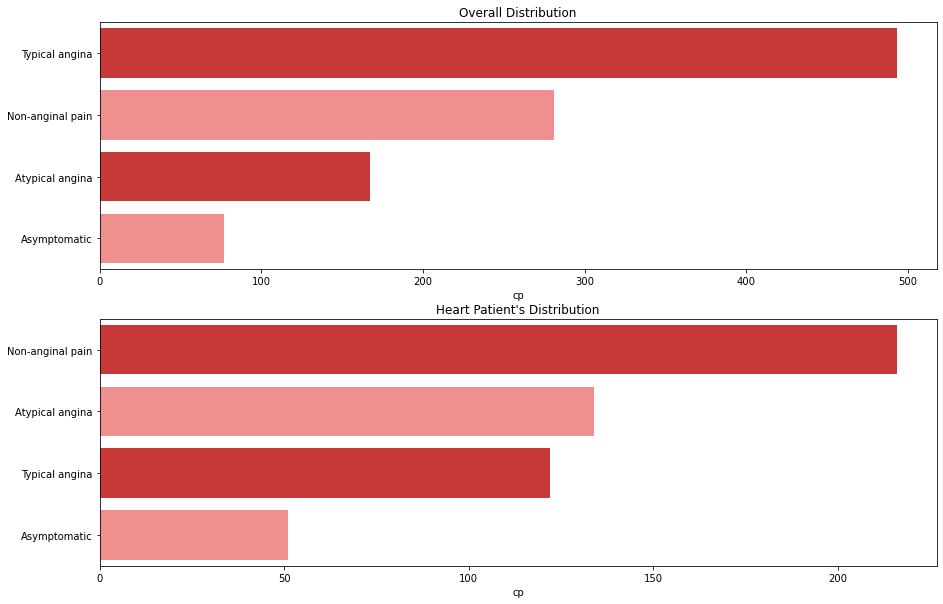

In [29]:
#Chest Pain - cp

val=dt["cp"].value_counts()
val1=dt1["cp"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors)

plt.subplot(2, 1, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

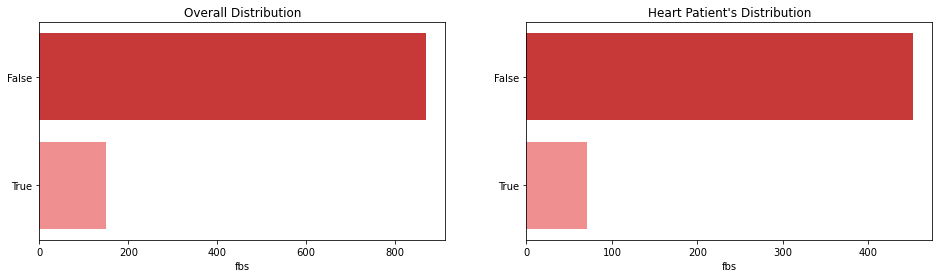

In [30]:
#Fasting Blood Sugar - fbs

val=dt["fbs"].value_counts()
val1=dt1["fbs"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors, )

plt.subplot(1, 2, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

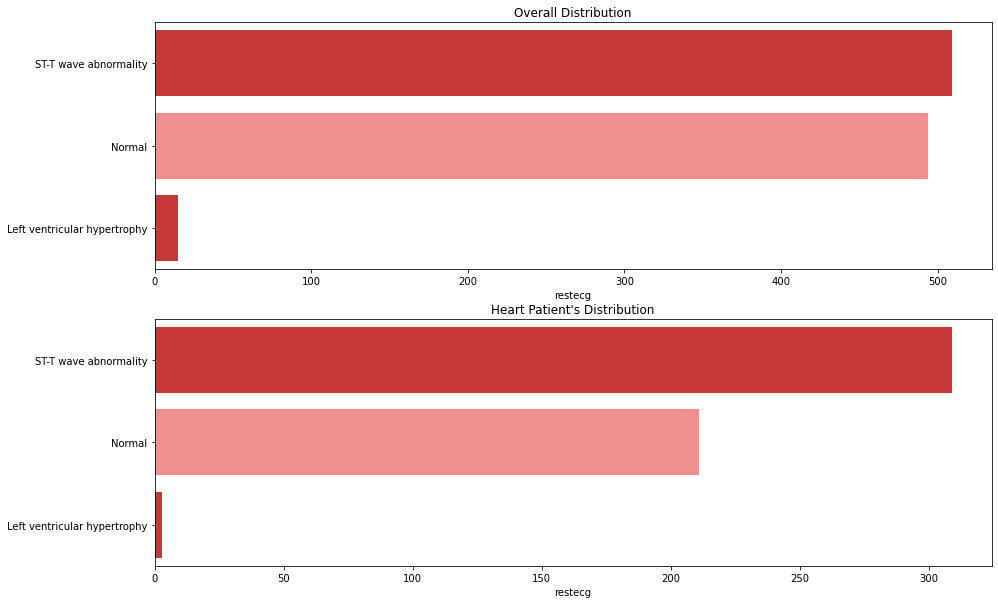

In [31]:
#Resting ECG - restecg

val=dt["restecg"].value_counts()
val1=dt1["restecg"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors)

plt.subplot(2, 1, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

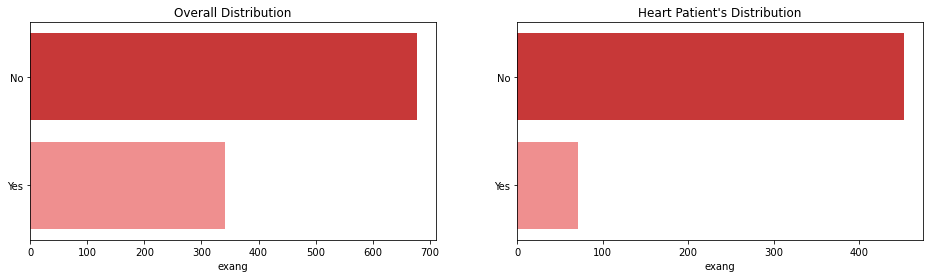

In [32]:
#Exercise Induced Angina - exang

val=dt["exang"].value_counts()
val1=dt1["exang"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors)

plt.subplot(1, 2, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

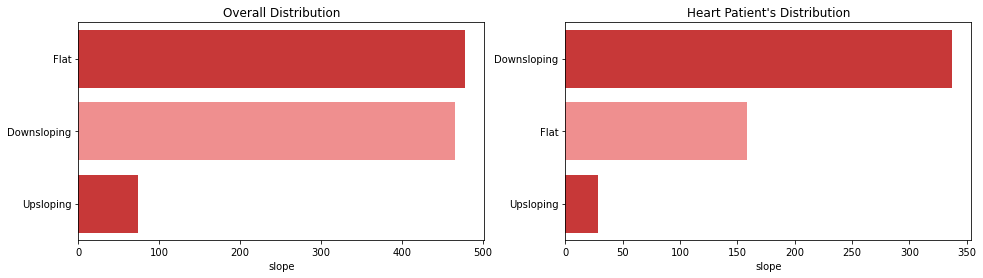

In [33]:
#Slope of peak exercise ST segment - slope

val=dt["slope"].value_counts()
val1=dt1["slope"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors)

plt.subplot(1, 2, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

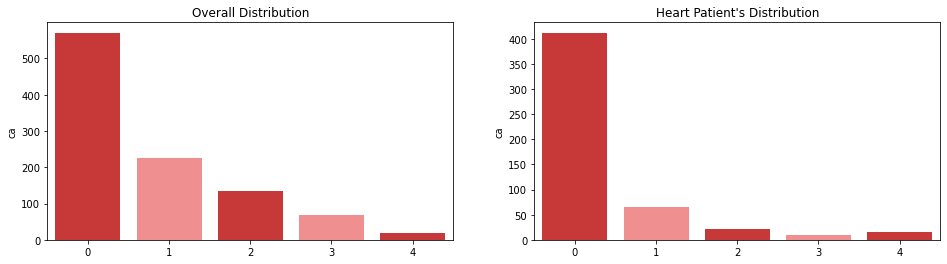

In [34]:
#Number of major vessels - ca

val=dt["ca"].value_counts()
val1=dt1["ca"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1)
plt.title("Overall Distribution")
sns.barplot(x=val.index, y=val, palette=colors)

plt.subplot(1, 2, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1.index, y=val1, palette=colors)
plt.show()

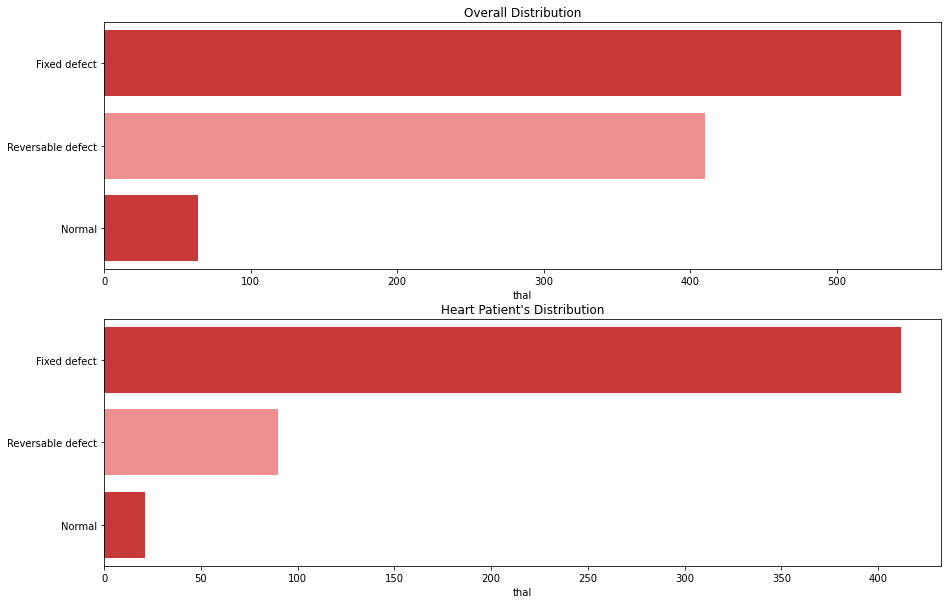

In [35]:
#Thalassemia - thal

val=dt["thal"].value_counts()
val1=dt1["thal"].value_counts()

#colors=['#df2020', '#ec8f90']
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.title("Overall Distribution")
sns.barplot(x=val, y=val.index, palette=colors)

plt.subplot(2, 1, 2)
plt.title("Heart Patient's Distribution")
sns.barplot(x=val1, y=val1.index, palette=colors)
plt.show()

### Numerical Features Distribution

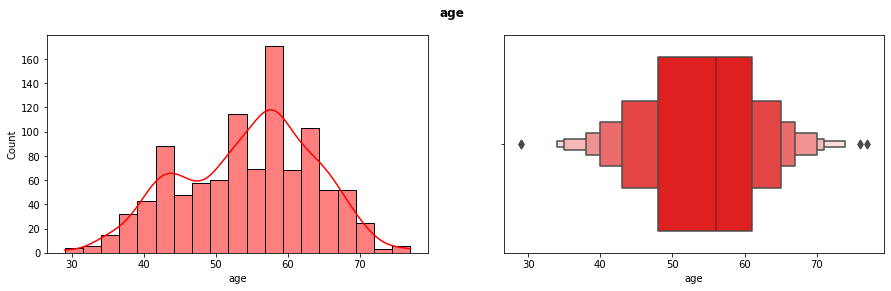

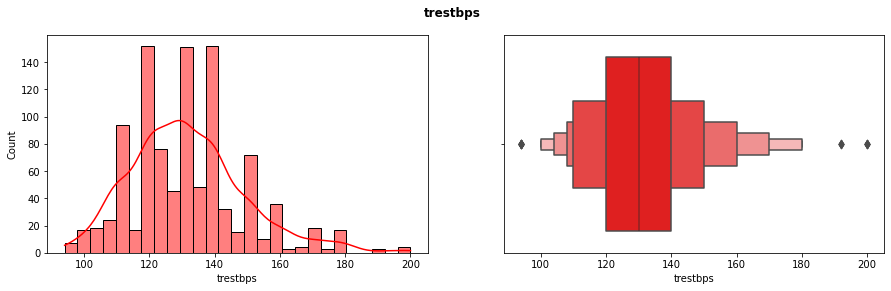

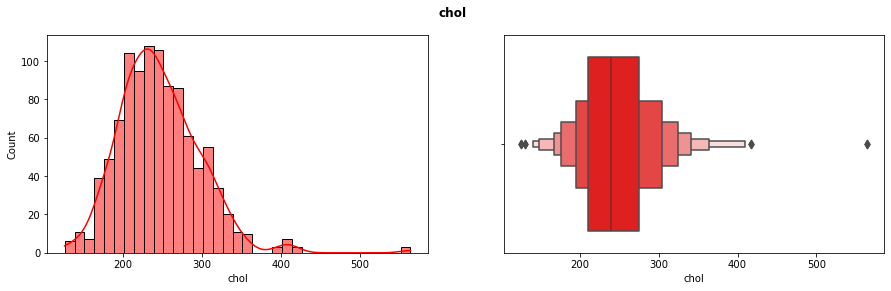

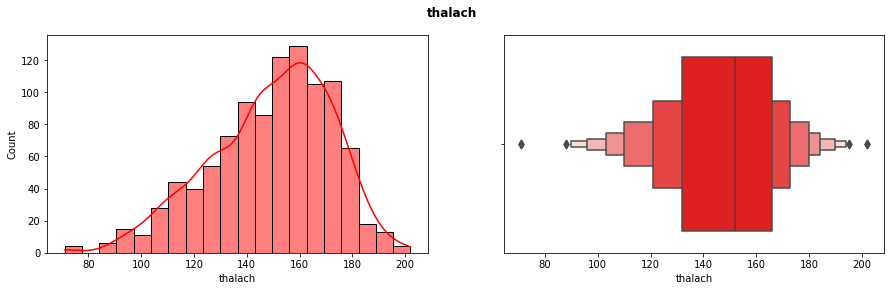

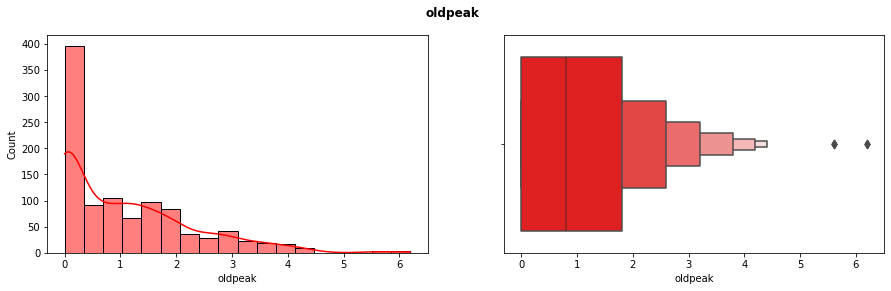

In [36]:

def plot_numerical_dist(fname):
    plt.figure(figsize=(15,4))
    plt.suptitle('{}'.format(fname), fontsize=12,fontweight='bold')

    plt.subplot(1,2,1)
    sns.histplot(data=df,x=fname , kde=True, color='r')
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=fname, color='r')

list(map(plot_numerical_dist,numerical_features))
plt.show()

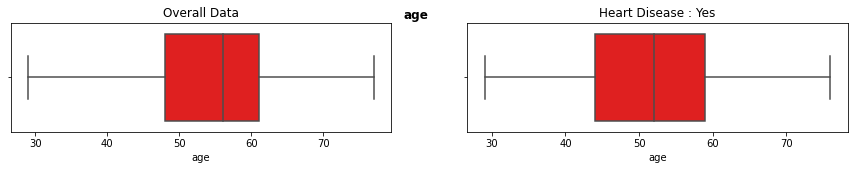

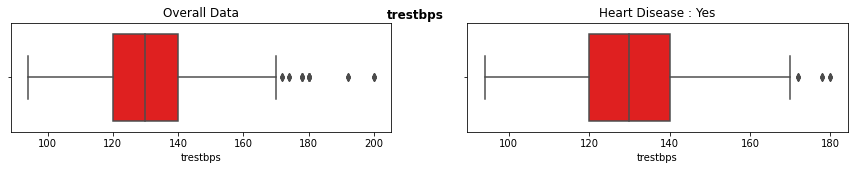

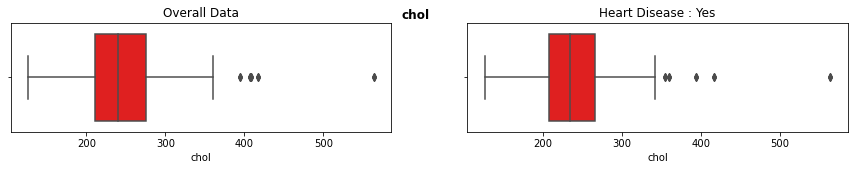

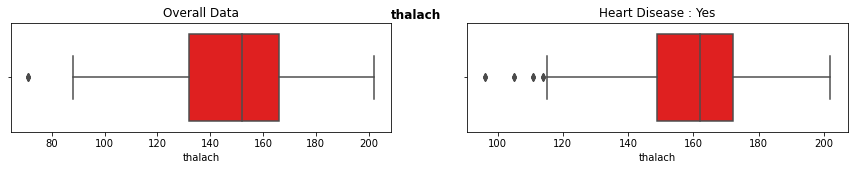

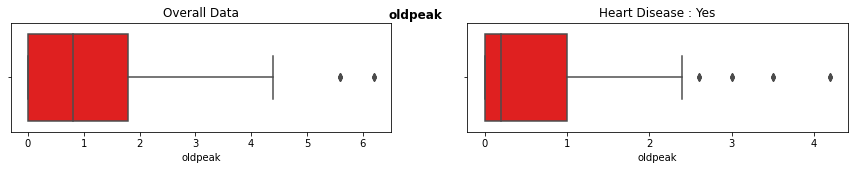

In [37]:
numerical_features=['age', 'trestbps', 'chol' , 'thalach', 'oldpeak']

def plot_numerical_dist(fname):
    plt.figure(figsize=(15,2))
    plt.suptitle('{}'.format(fname), fontsize=12,fontweight='bold')

    plt.subplot(1,2,1)
    plt.title('Overall Data')
    sns.boxplot(data=df,x=fname ,color='r')
    
    plt.subplot(1,2,2)
    plt.title('Heart Disease : Yes')
    sns.boxplot(data=df1,x=fname ,color='r')

list(map(plot_numerical_dist,numerical_features))
plt.show()

### References:

https://www.kaggle.com/code/purba01/stacked-ensemble-for-heart-disease-classification

https://www.kaggle.com/code/shivarajmishra/web-application-for-heart-disease-risk-in-ml

https://www.kaggle.com/code/akashkotal/heart-disease-eda-with-7-machine-learning-model/notebook

https://www.kaggle.com/code/kumaryogesh9656/heart-disease-data-modelling

https://www.kaggle.com/code/balmeetkaur/heart-disease-data-insights-and-predictions

https://www.kaggle.com/code/asmaabdolahpoor/heartdisease-eda-visualization/notebook